### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from keras.utils import np_utils

### Lendo os dados de treino: ----

In [2]:
def load(f):
    return np.load(f)['arr_0']

x_train = load('k49-train-imgs.npz')
y_train = load('k49-train-labels.npz')

# Flatten images
x_train = x_train.reshape(-1, 784)

#scaler = preprocessing.StandardScaler().fit(x_train)


### Quantas observações por classe:

In [3]:
observacoes_por_classe = pd.Series(y_train).astype(int).value_counts()

In [4]:
observacoes_por_classe.sort_values(ascending=True)  ##classe com o menor número de observações

45     392
44     417
3      777
36    1598
32    1718
29    1993
22    2063
42    2139
43    2397
23    2451
16    2565
31    3060
33    3394
48    3523
14    3867
13    4165
8     4714
26    5132
37    6000
35    6000
34    6000
38    6000
39    6000
40    6000
24    6000
46    6000
27    6000
47    6000
21    6000
20    6000
19    6000
18    6000
17    6000
15    6000
12    6000
11    6000
10    6000
9     6000
7     6000
6     6000
5     6000
4     6000
2     6000
1     6000
25    6000
0     6000
28    6000
30    6000
41    6000
dtype: int64

<AxesSubplot:>

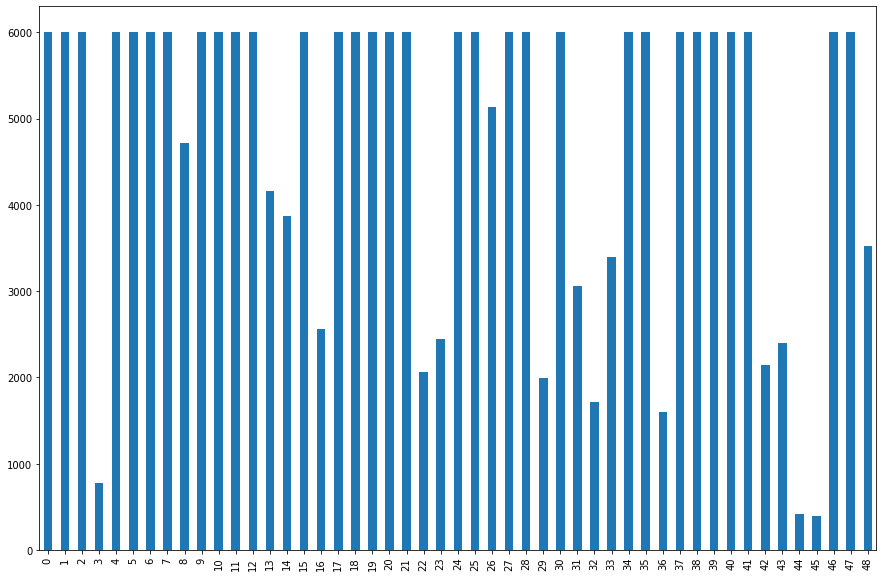

In [5]:
observacoes_por_classe.sort_index().plot.bar(figsize=(15, 10))

### APLICANDO PCA:

In [6]:
# Flatten images
# x_train = x_train.reshape(-1, 784)

# x_train.shape

In [7]:
# 2. Decomponha a matriz de variâncias e covariâncias em componentes principais.
# X = np.matrix(x_train)
# S = np.cov(np.transpose(X))

In [8]:
# variâncias
# np.diagonal(S)



In [9]:

# Z-score the features (usando correlação)
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

# pca = PCA(n_components=784)

# pca.fit(X)

In [10]:
# np.round(pca.explained_variance_ratio_,4)

In [11]:
# variancia_explicada = pca.explained_variance_ratio_.cumsum()
# len(variancia_explicada[variancia_explicada<=0.90])

para ter 90 da variância explicada, só precisa da 163 primeiras componentes

In [12]:
# principalDf =  pca.fit_transform(X)[:, :169]

### Dividindo entre treino e validação

In [13]:
x_treino,x_val, y_treino, y_val  = train_test_split(
...     x_train, y_train, test_size=0.20)

### Regressão Logística Multinomial

In [14]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
#logreg = LogisticRegression(penalty='none', max_iter=500)
# fit the model on the whole dataset
logreg.fit(x_treino, y_treino)

C:\Users\karin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [15]:
## Acurácia, acertos geral, na amostrane validação
logreg.score(x_val, y_val)

0.6724549738557872

### Árvore de classificação:

In [16]:
arvore= tree.DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [17]:
## Acurácia, acertos geral, na amostrane validação
arvore.score(x_val, y_val)

0.6030813590687065

### 4 Vizinhos Mais Próximos:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')


### 5 Vizinhos Mais Próximos:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

### 3 Vizinhos Mais Próximos:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

### Floresta Aleatória:

In [ ]:
ra_fo = RandomForestClassifier(n_estimators=100)
ra_fo.fit(x_treino, y_treino)
ra_fo.score(x_val, y_val)

## Redes Neurais:

In [ ]:
y_treino_catg = np_utils.to_categorical(y_treino)
y_val_catg = np_utils.to_categorical(y_val)

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28

NUM_CLASSES = 49
NO_EPOCHS = 25
BATCH_SIZE = 128

In [ ]:
num_images_train = x_treino.shape[0]
x_shaped_treino = x_treino.reshape(num_images_train, IMG_ROWS, IMG_COLS, 1)

num_images_val = x_val.shape[0]
x_shaped_val = x_val.reshape(num_images_val, IMG_ROWS, IMG_COLS, 1)

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_shaped_treino, y_treino_catg,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          validation_data=(x_shaped_val, y_val_catg))

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_shaped_val)
#get the indices to be plotted
y_true = np.argmax(y_val_catg,axis=1)

((y_true==predicted_classes).sum())/ y_true.shape

### "Forçando um dataset balanceado"

In [ ]:
balanceamento = observacoes_por_classe.min()
balanceamento

In [ ]:
## Transformar numpy em dataframe para esse sorteio: ---
df_treino = pd.DataFrame(x_train)
df_treino['y'] =  pd.DataFrame(y_train)

In [ ]:
df_treino

In [ ]:
df_treino_balanceado = pd.DataFrame()
for y in list(df_treino.y.unique()):
    df_parcial = df_treino[df_treino.y==y].sample(n = balanceamento)
    df_treino_balanceado = pd.concat([df_treino_balanceado, df_parcial])


In [ ]:
y_train_balanceado = df_treino_balanceado.y.to_numpy()
df_treino_balanceado.drop(columns=['y'], inplace = True)
y_train_balanceado

In [ ]:
x_train_balanceado = df_treino_balanceado.to_numpy() 
x_train_balanceado.shape

## Refazendo os modelos, para o dataset balanceado

### Dividindo entre treino e validação

In [ ]:
x_treino,x_val, y_treino, y_val  = train_test_split(
...     x_train_balanceado, y_train_balanceado, test_size=0.20)

### Regressão Logística Multinomial

In [ ]:
#logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg = LogisticRegression(penalty='none', max_iter=1000)
# fit the model on the whole dataset
logreg.fit(x_treino, y_treino)

In [ ]:
## Acurácia, acertos geral, na amostrane validação
logreg.score(x_val, y_val)

### Árvore de classificação:

In [ ]:
arvore= tree.DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

In [ ]:
## Acurácia, acertos geral, na amostrane validação
arvore.score(x_val, y_val)

### 4 Vizinhos Mais Próximos:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

### 5 Vizinhos Mais Próximos:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

### 3 Vizinhos Mais Próximos:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

### Floresta Aleatória:

In [ ]:
ra_fo = RandomForestClassifier(n_estimators=100)
ra_fo.fit(x_treino, y_treino)
ra_fo.score(x_val, y_val)

## Redes Neurais:

In [ ]:
y_treino_catg = np_utils.to_categorical(y_treino)
y_val_catg = np_utils.to_categorical(y_val)

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28

NUM_CLASSES = 49
NO_EPOCHS = 25
BATCH_SIZE = 128

In [ ]:
num_images_train = x_treino.shape[0]
x_shaped_treino = x_treino.reshape(num_images_train, IMG_ROWS, IMG_COLS, 1)

num_images_val = x_val.shape[0]
x_shaped_val = x_val.reshape(num_images_val, IMG_ROWS, IMG_COLS, 1)

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

history = model.fit(x_shaped_treino, y_treino_catg,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          validation_data=(x_shaped_val, y_val_catg))




In [ ]:

#get the predictions for the test data
predicted_classes = model.predict_classes(x_shaped_val)
#get the indices to be plotted
y_true = np.argmax(y_val_catg,axis=1)

((y_true==predicted_classes).sum())/ y_true.shape